# Project 5 - California Housing – Predict media house value (regression)
* Muhammed Albayati

### Guidelines

You need to produce an R or Python notebook that covers the full scope of the data science courses, from exploring data to optimizing machine learning model performance. Throughout each stage of the process, thoroughly explain your thought process. For example, perhaps you chose to ignore a certain variable because it is too related to another feature, or because regularization indicated it was not useful.
 

* Exploratory Data Analysis: Summarize variables, visualize distributions and relationships. Generate a few interesting questions about the data and explore them with some visualizations.
* Research Methods: Calculate the sample correlation between at least one pair of variables. Come up with a hypothesis and calculate the p-value.
* Data Cleaning and Preparation: Apply any appropriate preprocessing steps, such as removing duplicates, missing values, outliers, and scaling data as appropriate (note that which model(s) is/are chosen may determine whether scaling is necessary).
* Feature Engineering: Create new features or transform existing ones to improve performance. Even if you decide not to use these features (e.g., they don’t affect performance or make it worse), keep the code and an explanation of what you tried in your notebook.
* Model Selection: Try various models (at least 3), showing your evaluation process. Clearly indicate which metrics you used and the performance of each model. Be sure to address any imbalance in the data, as well as using an appropriate train/test data split.
* Performance Optimization: Use regularization, hyperparameter tuning, or other techniques to further optimize your chosen model and/or help select the best model.
 

## Supervised Learning    
    Supervised Learning, we have a target/outcome variable which is to be predicted from a given set of features/independent variables. The algorithm works by using the set of features and generating a function that maps inputs to desired outputs. The training process continues until the model achieves the desired level of accuracy on the training data, which is then used on the new unseen data. There are two types of supervised machine learning algorithms – Classification and Regression.

### 1 Understand the requirements of the business.
1.1 Why does our organisation need this predictive model?
- possibly we are a real-estate firm and interested in investing in California
- the organisation will use this data to feed another machine learning model
- current process is good but manual and time consuming
- our organisation wants an edge over competition
- we are a consulting firm in the real-estate business and this data is valuable
1.2 We need to understand what are we doing at the root level
- We’ll train our model on existing data so we are doing supervised learning
- Since we need to predict housing prices we are doing regression
- Output depends on many parameters so we are doing multivariate-regression

## Load the dataset
* Get the dataset in CSV format https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
 and store it in a folder.

Start Jupyter notebook and do the basic imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/cal_housing.csv')
df.head()

,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0


As we can see our data has no header, so we need to set a header

In [3]:
cols=['longitude','latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
            'households', 'median_income', 'median_house_value' ]
df.columns=cols
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20639 non-null  float64
 1   latitude            20639 non-null  float64
 2   housing_median_age  20639 non-null  float64
 3   total_rooms         20639 non-null  float64
 4   total_bedrooms      20639 non-null  float64
 5   population          20639 non-null  float64
 6   households          20639 non-null  float64
 7   median_income       20639 non-null  float64
 8   median_house_value  20639 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000
mean,-119.569576,35.631753,28.638888,2635.848152,537.917825,1425.530210,499.557779,3.870455,206843.910122
std,2.003495,2.135947,12.585568,2181.633870,421.248495,1132.463507,382.330173,1.899615,115385.731702
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,295.500000,787.000000,280.000000,2.563100,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.742850,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3. Visualize the Data

### Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

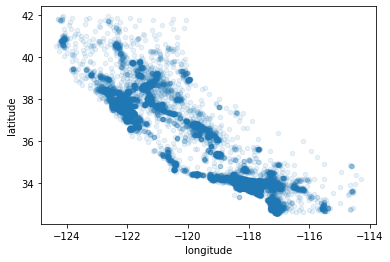

In [7]:
# since there are latitude and longitudes, its good idea to have a scatter plot
#set alpha =0.1 to clearly see dense points
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

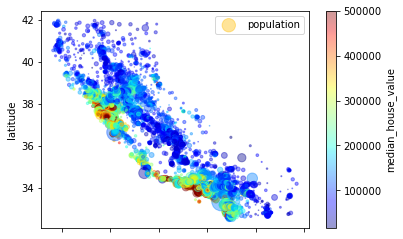

In [8]:
#advanced scatter plot using median value of house
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
         s=df["population"]/100,label="population",
         c="median_house_value",cmap=plt.get_cmap("jet"),
         colorbar=True)
plt.legend()

In [9]:
df.drop(['longitude','latitude'],'columns',inplace=True)
df.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

* The plot below give us some idea about our data using correlation between variables.

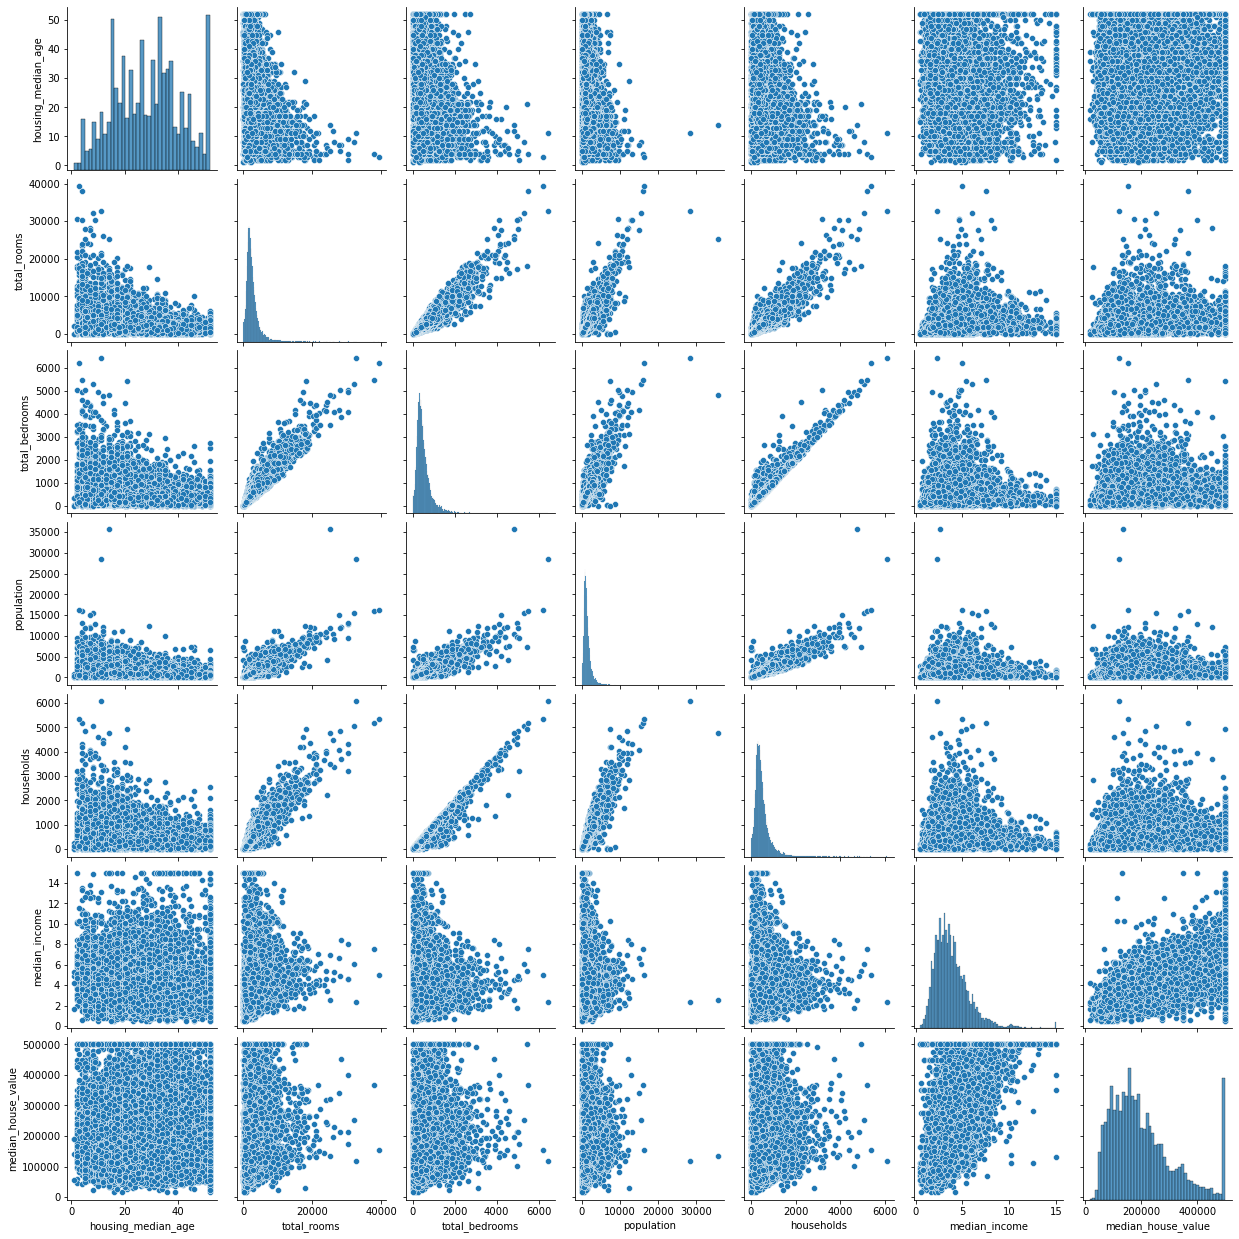

In [10]:
sns.pairplot(df)

* Using histgram to see the features distribution

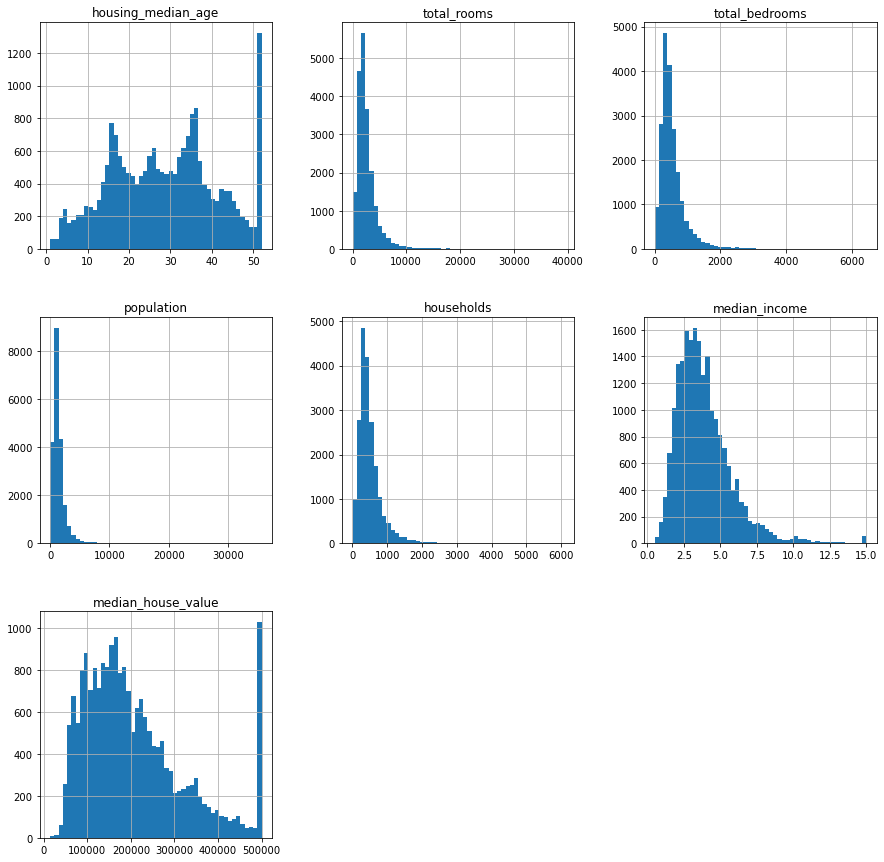

In [11]:
df.hist(bins=50, figsize=(15,15))
plt.show()

#### We are seeing each feature of our data-set as a histogram
* housing median age — well, not very bell-shaped, at 35 and 15 are two peaks. are these years? max peak is at 50. does this mean major houses in each district are more than 50 years old?!?
* total rooms — again similar to the previous two. most districts have around 3000 rooms
* total bedrooms —* we have got bedrooms for a district? looks like most districts have between 300–600 bedrooms
* population — most districts have population below 3000
* households — * most districts have around 100–500 households. peak is around 4800
* median income — very bell-shaped, good distribution, but is this income in dollars? There is no income above 15 so some capping has been done. most people have income between 2–5
* median house value — *, this is what i need to predict.A clear sudden peak around 500000, which is very different from others. It is recommended to remove these data in training the model.

## Check for outliers using boxplot 
* From the statistics above we find out that the max for medianHouseValue is 500001, that could be an outlier

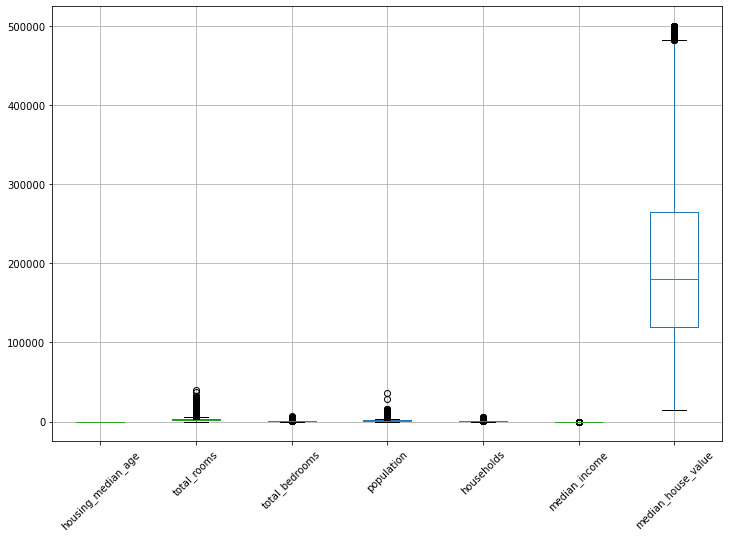

In [12]:
boxplot=df.boxplot(figsize=(12,8),rot=45);

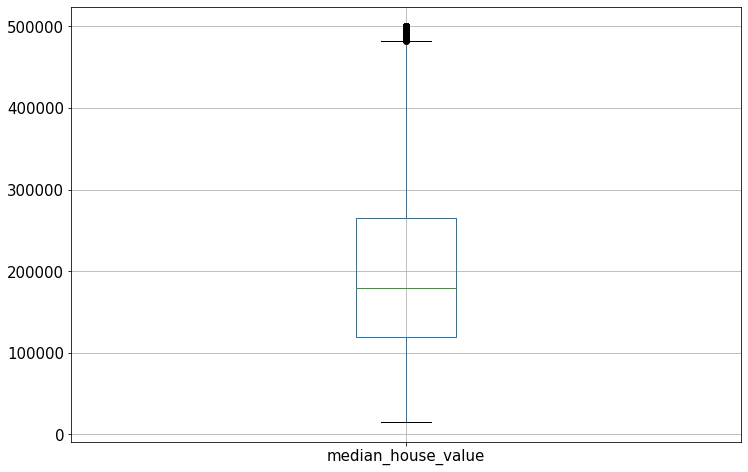

In [13]:
boxplot = df.boxplot(fontsize=15, column=['median_house_value'], figsize=(12, 8))

In [14]:
# Find all rows with 'median_house_value' = 500001
df.loc[df['median_house_value'] == 500001].count()

housing_median_age    965
total_rooms           965
total_bedrooms        965
population            965
households            965
median_income         965
median_house_value    965
dtype: int64

In [15]:
# drop all rows with 'medianHouseValue' = 500001
df = df.drop(df.loc[df['median_house_value'] == 500001].index)

In [16]:
df.shape

(19674, 7)

## Selecting features and target values
* We know our target which is the median_house_value, but we need to figure out which feature is important and which is not.

### Correlation
* also known as the Pearson coefficient
* its a value between +1 and -1
* +1 means two attributes are highly correlated
* 0 means two attributes are not at all correlated
* -1 means two attributes are inversely correlated
* the correlation coefficient only measures linear relationships
* Let’s find out if there is correlation between our attributes using scatter_matrix method
* Scatter_matrix plots every attribute with every other attribute. We’ll pass the attributes that we think are important like this…

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

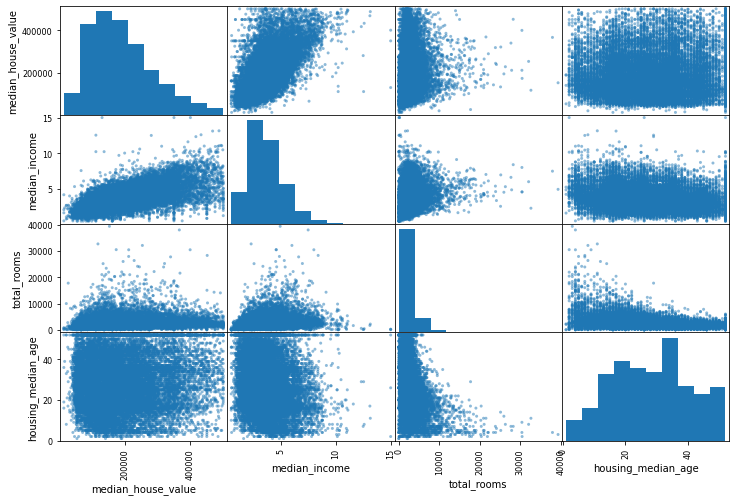

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(12,8))

### We’ll focus on the correlation between 'median_house_value' and the 'median_house_income'

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

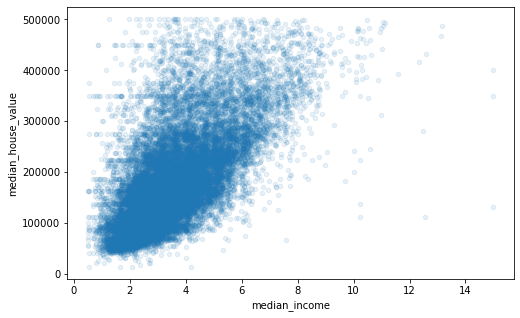

In [18]:
df.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1, figsize=(8,5))

* The above scatter plot show us good correlation
* We see a horizontal line at the top which marks the upper capping

In [19]:
df_corr = df.corr().round(2)
df_corr

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.00,-0.37,-0.33,-0.30,-0.31,-0.19,0.07
total_rooms,-0.37,1.00,0.93,0.86,0.92,0.22,0.14
total_bedrooms,-0.33,0.93,1.00,0.88,0.98,0.02,0.08
population,-0.30,0.86,0.88,1.00,0.91,0.04,0.01
households,-0.31,0.92,0.98,0.91,1.00,0.05,0.10
median_income,-0.19,0.22,0.02,0.04,0.05,1.00,0.64
median_house_value,0.07,0.14,0.08,0.01,0.10,0.64,1.00


### Find the relationship between features using correlation heatmap chart
* This step is important to select features, in our case we just have few columns, but if you have big number of columns then you start thinking which columns should you select to train and test your ML model.

<AxesSubplot:>

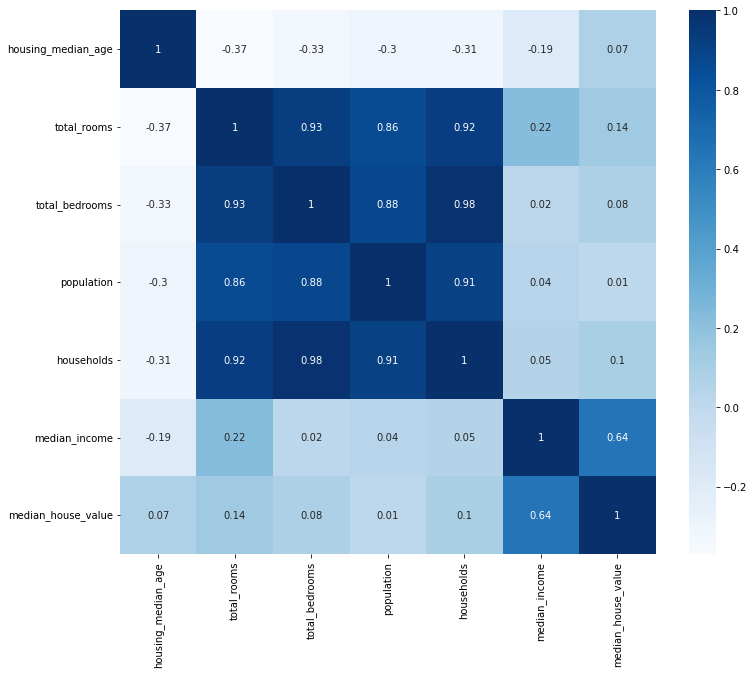

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(df_corr, annot=True, cmap="Blues")

### Find Median_Home_Value the highest positive and nagative corrolation variables

In [21]:
print("Highest positive :")
print(df_corr['median_house_value'].nlargest(5))
print('---------------------')
print("Highest nagative :")
print(df_corr['median_house_value'].nsmallest(5))

Highest positive :
median_house_value    1.00
median_income         0.64
total_rooms           0.14
households            0.10
total_bedrooms        0.08
Name: median_house_value, dtype: float64
---------------------
Highest nagative :
population            0.01
housing_median_age    0.07
total_bedrooms        0.08
households            0.10
total_rooms           0.14
Name: median_house_value, dtype: float64


### Features correlation with dependant variable using Yellowbrick

In [22]:
#### Features and Target split
target = df['median_house_value']
features = df.drop('median_house_value', axis=1)

In [23]:
# 3rd way to check the correlation
# yellowbraick extends the scikit-learn API with visual analysis and diagnostic tools that helps model selection
# !pip install yellowbrick
from yellowbrick.target import FeatureCorrelation
target = df['median_house_value']
features = df.drop('median_house_value', axis=1)
feature_names = list(features.columns)

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(features, target)
visualizer.poof()

## Data Scaling and Transformations
    We have nine numerical features - housing_median_age, total_rooms,	total_bedrooms,	population,	households,	median_income, and	median_house_value. However, most of them have different units and scale, such as 'housing_median_age' in years and 'median_income' in dollars. These differences can unduly influence the model and, therefore, we need to scale or transform the features. There are several techniques to achieve this.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
independent_scaler = StandardScaler()
x_train = independent_scaler.fit_transform(x_train)
x_test = independent_scaler.transform(x_test)

# Will show just first 5 rows
print(x_train[0:5,:])
print("test data")
print(x_test[0:5,:])

# Estimator/algorithm Selection
* Will use multiple estimator/algorithm and then choose the right model depend on cross validation highest mean
* We can use the sklearn map to help us to choose the right algorithm 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Linear Regression
    The simplest form of regression is the linear regression, which assumes that the predictors have a linear relationship with the target variable. The input variables are assumed to have a Gaussian distribution. Another assumption is that the predictors are not highly correlated with each other (a problem called multi-collinearity).

    The linear regression equation can be expressed in the following form:

    y = a1x1 + a2x2 + a3x3 + ..... + anxn + b

    Where the following is true:

    y is the target variable.
    x1, x2, x3,...xn are the features.
    a1, a2, a3,..., an are the coefficients.
    b is the parameter of the model.
    The parameters a and b of the model are selected through the Ordinary least squares (OLS) method. It works by minimizing the sum of squares of residuals (actual value - predicted value).

    In order to fit the linear regression model, the first step is to instantiate the algorithm that is done in the first line of code below. The second line fits the model on the training set.


In [ ]:
from sklearn.linear_model import LinearRegression

def linear_model(x_train, y_train):

    print("Linear Regression ")
    linear_regression = LinearRegression()

    linear_regression.fit(x_train, y_train)

    return linear_regression


## Regularized Regression
    As discussed above, linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients. The following sections of the guide will discuss the various regularization algorithms.

### Lasso regression
    Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

    The loss function for Lasso Regression can be expressed as below:

    Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

    In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

    In scikit-learn, a lasso regression model is constructed by using the Lasso class. The first line of code below instantiates the Lasso Regression model with an alpha value of 0.8. The second line fits the model to the training data.

    The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the sixth to eight lines of code.
https://app.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn


In [ ]:
from sklearn.linear_model import Lasso

def lasso_model(x_train, y_train):

    print("Lasso Regression")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)

    lasso_regression.fit(x_train, y_train)

    return lasso_regression

### Ridge regression
    Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.
    * Loss function = OLS + alpha * summation (squared coefficient values)
    * Ordinary least squares (OLS)
    In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

    In scikit-learn, a ridge regression model is constructed by using the Ridge class. The first line of code below instantiates the Ridge Regression model with an alpha value of 0.9. The second line fits the model to the training data.

    The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the sixth to eight lines of code.
https://app.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

In [ ]:
from sklearn.linear_model import Ridge

def ridge_model(x_train, y_train):

    print("Ridge Regression")
    ridge_regression = Ridge(alpha=0.9)
    ridge_regression.fit(x_train, y_train)
    return ridge_regression

### Random Forest Regression model
    Random Forest is an extension of bagged decision trees, where the samples of the training dataset are taken with replacement. The trees are constructed with the objective of reducing the correlation between the individual decision trees. In scikit-learn, a random forest model is constructed by using the RandomForestRegressor class.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def randomForest_model(x_train, y_train):
    
    print("Random Forest")
    # n_estimators default value is 100 you can use other values
    randomForest_regression = RandomForestRegressor(n_estimators=100)
    randomForest_regression.fit(x_train, y_train)
    return randomForest_regression

## build_and_train_model
     Will build a method can be used many time to build and train diffrent ML models\
     in this method will use many libraries like \
        1- StandardScaler for Data Scaling and Transformations
        2- train_test_split
        3- r2_score
     

* Data Scaling and Transformations\
    We have nine numerical features - housing_median_age, total_rooms,	total_bedrooms,	population,	households,	median_income, and	median_house_value. However, most of them have different units and scale, such as 'housing_median_age' in years and 'median_income' in dollars. These differences can unduly influence the model and, therefore, we need to scale or transform the features. There are several techniques to achieve this.

    * R-squared values range from 0 to 1 and are commonly stated as percentages. It is a statistical measure that represents the proportion of the variance for a target variable that is explained by the independent variables

In [ ]:
# Splitting 80% for training and 20% for testing
# most our data shuld go for training, to get good model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
def build_and_train_model(data, target_name, reg_fn):

    X = data.drop(target_name, axis=1)
    Y = data[target_name]

    x_train, x_test, y_train, y_test = \
        train_test_split(X, Y, test_size=0.2, random_state=0)

    # Data Scaling and Transformations
    independent_scaler = StandardScaler()
    x_train = independent_scaler.fit_transform(x_train)
    x_test = independent_scaler.transform(x_test)
    
    model = reg_fn(x_train, y_train)

    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
#     cross validation
#     cv=5: 5-fold Cross-validation
#     model is trained on 5 different versions of traning data, and evaluated on 5 different version of the test data
    scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
    print("Cross-Validation Scores: ", scores)
    print("Cross-Validation Scores mean : ",scores.mean())


    return {'model': model,
            'x_train': x_train, 'x_test': x_test,
            'y_train': y_train, 'y_test': y_test,
            'y_pred': y_pred
            }


In [ ]:
linear_reg = build_and_train_model(df, "median_house_value", linear_model)

In [ ]:
lasso_reg = build_and_train_model(df, "median_house_value", lasso_model)

In [ ]:
ridge_reg = build_and_train_model(df, "median_house_value", ridge_model)

In [ ]:
randomForest_reg = build_and_train_model(df, "median_house_value", randomForest_model)

### will choose the highest test score value which is the Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate Random Forest Regressor model
# n_estimators default value is 100 you can use other values
X = df.drop("median_house_value", axis=1)
Y = df["median_house_value"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
rf = RandomForestRegressor()
rf.fit(x_train, y_train);
rf.get_params()

## Hyperparameters Tuning using GridSearchCV
    GridSearchCV is a function that comes in Scikit-learn’s(or SK-learn) model_selection package.So an important point here to note is that we need to have Scikit-learn library installed on the computer. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.
    
source: https://www.mygreatlearning.com/blog/gridsearchcv/

In [ ]:
# The code will take long time (about ~ 
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[100,200, 400]}
gscv=GridSearchCV(rf,param_grid=params,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

In [ ]:
print('Best score : ',gscv.best_score_)

In [ ]:
print('Score for Random Forest Regressor model: ',gscv.score(x_test,y_test))

### Random Forest predict vs actual

In [ ]:
y_pred = gscv.predict(x_test)
df_pred_actual = pd.DataFrame({'rf_predicted': y_pred, 'actual': y_test})
df_pred_actual.head(5).round(1)

## Plot actual versus predicted for Random Forest Regression


In [ ]:
# reset_index to start from 0
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [ ]:
# here we plot actual versus predicted values using a line cahrt
plt.figure(figsize=(20, 10))
plt.plot(df_pred_actual_sample['rf_predicted'], label='rf_predicted')
plt.plot(df_pred_actual_sample['actual'], label='actual')

plt.ylabel('median_house_value')
plt.legend()
plt.show()

# GradientBoostingRegressor & GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [ ]:
X = df.drop('median_house_value', axis=1)
Y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
baseline = GradientBoostingRegressor(max_depth=3, n_estimators=50)
baseline.fit(x_train, y_train)

In [ ]:
y_pred = baseline.predict(x_test)

r2_score(y_test, y_pred)

## Feature Importance

In [ ]:
important_features = pd.Series(baseline.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

## HyperparameterTuning

In [ ]:
# Note: This code below will take long time to run. (About ~ 2 minutes) 
gbr = GradientBoostingRegressor(max_depth=3)
parameters = {'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500]}

gridsearch_reg = GridSearchCV(estimator=gbr, param_grid=parameters, cv=3)
gridsearch_reg.fit(x_train, y_train);

In [ ]:
gridsearch_reg.best_params_

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, 
                                n_estimators = gridsearch_reg.best_params_['n_estimators'])

gbr_best=gbr.fit(x_train, y_train)

In [ ]:
y_pred = gbr_best.predict(x_test)
r2_score(y_test, y_pred)

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, warm_start=True)

## Tuning for n_estimators
warm_start=True  allows you to add more estimators to an already fitted model.

In [ ]:
min_val_error = float("inf")
error_increasing = 0

for n_estimators in range(1, 1000):
    gbr.n_estimators = n_estimators
    gbr.fit(x_train, y_train)
    
    y_pred = gbr.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    
    print('No. of estimators: ', gbr.n_estimators_)
    print('Validation error: ', val_error)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_increasing = 0
    else:
        error_increasing += 1
        if error_increasing == 10:
            break

In [ ]:
n_estimators

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
gbr_best = GradientBoostingRegressor(max_depth=3,
                                     n_estimators = n_estimators)
gbr_best.fit(x_train, y_train)

In [ ]:
y_pred = gbr_best.predict(x_test)

r2_score(y_test, y_pred)

In [ ]:
y_pred = rf.predict(x_test)
df_pred_actual = pd.DataFrame({'rf_predicted': y_pred, 'actual': y_test})
df_pred_actual.head(5).round(1)

In [ ]:
# reset_index to start from 0
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [ ]:
# here we plot actual versus predicted values using a line cahrt
plt.figure(figsize=(20, 10))
plt.plot(df_pred_actual_sample['rf_predicted'], label='rf_predicted')
plt.plot(df_pred_actual_sample['actual'], label='actual')

plt.ylabel('median_house_value')
plt.legend()
plt.show()